<a href="https://colab.research.google.com/github/u1-byte/SmartRicePriceControl/blob/main/Machine%20Learning/Code/ML_Building_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODEL UNTUK MEMPREDIKSI TOTAL PRODUKSI BERAS PADA WILAYAH TERTENTU

1.   Input : Suhu, kelembaban, curah hujan, lama penyinaran, luas lahan
2.   Output : Total produksi beras
3.   Scope Input dan Output :  Data diambail rata rata dalam tiap bulan pada 3 kabupaten (Lamongan, Banyuwangi, Tuban) di Jawa Timur 
4.   Sumber : https://dataonline.bmkg.go.id/data_iklim,  https://jatim.bps.go.id/publication/2020/12/28/53ad74b4263660ce4adf0ed3/analisis-data-beras-provinsi-jawa-timur-2018-2020.html

In [2]:
#import library yang dibutuhkan
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import csv
from sklearn.preprocessing import MinMaxScaler

In [3]:
# upload file dataset dari lokal
uploaded = files.upload()

Saving Database.csv to Database.csv


# **Exploratory Data Analysis**

In [4]:
input_suhu_max = []
input_suhu_min = []
input_suhu_ratarata = []
input_kelembaban_max = []
input_kelembaban_min = []
input_kelembaban_ratarata = []
input_curah_hujan = []
input_lama_penyinaran = []
input_luas_lahan = []
number_of_input = []
number=1

#baca file.csv
with open('/content/Database.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    number_of_input.append(number)
    input_suhu_max.append(float(row[5]))
    input_suhu_min.append(float(row[6]))
    input_suhu_ratarata.append(float(row[7]))
    input_kelembaban_max.append(float(row[8]))
    input_kelembaban_min.append(float(row[9]))
    input_kelembaban_ratarata.append(float(row[10]))
    input_curah_hujan.append(float(row[11]))
    input_lama_penyinaran.append(float(row[12]))
    input_luas_lahan.append(float(row[13]))
    number+=1

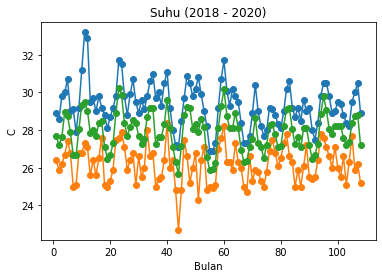

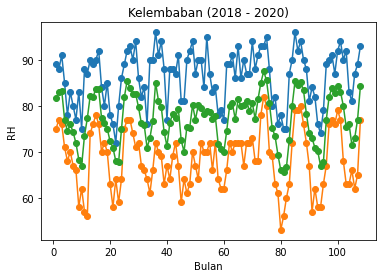

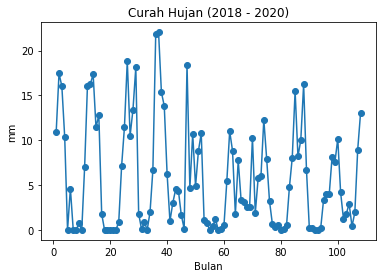

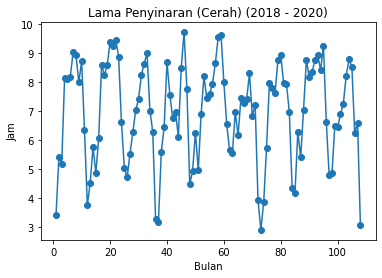

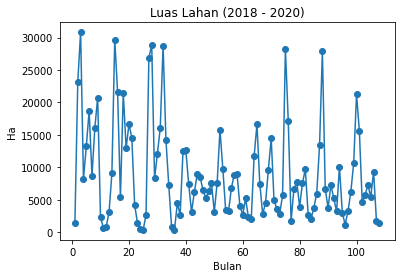

In [5]:
#Grafik garis dari Suhu
plt.plot(number_of_input,input_suhu_max,marker='o')
plt.plot(number_of_input,input_suhu_min,marker='o')
plt.plot(number_of_input,input_suhu_ratarata,marker='o')
plt.title('Suhu (2018 - 2020)')
plt.ylabel('C')
plt.xlabel('Bulan')
plt.show()

#Grafik garis dari Kelembaban
plt.plot(number_of_input,input_kelembaban_max,marker='o')
plt.plot(number_of_input,input_kelembaban_min,marker='o')
plt.plot(number_of_input,input_kelembaban_ratarata,marker='o')
plt.title('Kelembaban (2018 - 2020)')
plt.ylabel('RH')
plt.xlabel('Bulan')
plt.show()

#Grafik garis dari Curah Hujan
plt.plot(number_of_input,input_curah_hujan,marker='o')
plt.title('Curah Hujan (2018 - 2020)')
plt.ylabel('mm')
plt.xlabel('Bulan')
plt.show()

#Grafik garis dari Lama Penyinaran
plt.plot(number_of_input,input_lama_penyinaran,marker='o')
plt.title('Lama Penyinaran (Cerah) (2018 - 2020)')
plt.ylabel('Jam')
plt.xlabel('Bulan')
plt.show()

#Grafik garis dari Luas Lahan
plt.plot(number_of_input,input_luas_lahan,marker='o')
plt.title('Luas Lahan (2018 - 2020)')
plt.ylabel('Ha')
plt.xlabel('Bulan')
plt.show()

In [7]:
output_total_produksi_beras = []
number_of_output = []
number=1

#read file.csv
with open('/content/Database.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    number_of_output.append(number)
    output_total_produksi_beras.append(float(row[14]))
    number+=1

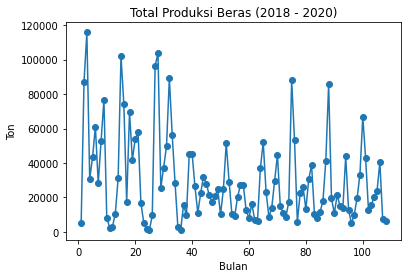

In [8]:
#grafik garis dari harga produsen
plt.plot(number_of_output,output_total_produksi_beras,marker='o')
plt.title('Total Produksi Beras (2018 - 2020)')
plt.ylabel('Ton')
plt.xlabel('Bulan')
plt.show()

# **Data Prepocessing**

In [ ]:
input = []
counter=0

#baca file.csv
with open('/content/Database 1 Kota.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    input.append([])
    input[counter].append(float(row[2]))
    input[counter].append(float(row[3]))
    input[counter].append(float(row[4]))
    input[counter].append(float(row[5]))
    input[counter].append(float(row[6]))
    input[counter].append(float(row[7]))
    input[counter].append(float(row[8]))
    input[counter].append(float(row[9]))
    input[counter].append(float(row[10]))
    counter+=1

input = np.array(input)

print(input)

[[3.0000e+01 2.5400e+01 2.7610e+01 9.1000e+01 7.0000e+01 8.1120e+01
  2.2050e+01 3.1900e+00 4.4110e+03]
 [2.9300e+01 2.5500e+01 2.7630e+01 9.4000e+01 6.9000e+01 7.9700e+01
  1.5340e+01 5.6000e+00 2.7020e+03]
 [3.0500e+01 2.6400e+01 2.8310e+01 8.8000e+01 6.3000e+01 7.4280e+01
  1.3840e+01 6.4500e+00 1.2480e+04]
 [3.1100e+01 2.8400e+01 2.9600e+01 7.7000e+01 6.7000e+01 7.1200e+01
  6.2500e+00 8.7000e+00 1.2586e+04]
 [2.9200e+01 2.6000e+01 2.8100e+01 8.8000e+01 6.4000e+01 7.6220e+01
  9.8000e-01 7.5800e+00 7.3710e+03]
 [2.8000e+01 2.6400e+01 2.7110e+01 8.8000e+01 6.9000e+01 7.8320e+01
  3.0100e+00 6.7700e+00 3.0820e+03]
 [2.7200e+01 2.4800e+01 2.6320e+01 8.7000e+01 7.2000e+01 7.7350e+01
  4.5100e+00 6.9900e+00 6.2150e+03]
 [2.7100e+01 2.2700e+01 2.5670e+01 9.1000e+01 6.7000e+01 7.9350e+01
  4.3100e+00 6.1200e+00 8.9510e+03]
 [2.8500e+01 2.4800e+01 2.7140e+01 8.1000e+01 5.9000e+01 7.2460e+01
  1.6300e+00 8.4900e+00 8.5260e+03]
 [2.9700e+01 2.7500e+01 2.8780e+01 8.1000e+01 6.4000e+01 7.0030e

In [ ]:
output = []
counter=0

#baca file.csv
with open('/content/Database 1 Kota.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    output.append([])
    output[counter].append(float(row[11]))
    counter+=1

output = np.array(output)

print(output)

[[15928.9 ]
 [ 9757.82]
 [45069.81]
 [45451.84]
 [26473.66]
 [11069.01]
 [22321.44]
 [32151.33]
 [28035.94]
 [21473.32]
 [17215.7 ]
 [20620.07]
 [24683.18]
 [10217.73]
 [24777.63]
 [51528.42]
 [29243.91]
 [10147.88]
 [ 9540.8 ]
 [20361.59]
 [27265.68]
 [27366.8 ]
 [12511.74]
 [ 8128.77]
 [16351.04]
 [ 7148.78]
 [ 6606.55]
 [36945.58]
 [52136.87]
 [23321.01]
 [ 8751.61]
 [14020.12]
 [29533.87]
 [44547.69]
 [15074.2 ]
 [11029.17]]


In [ ]:
split_scaled = 24

#split data input dan output
input_scaled = input[:split_scaled]
output_scaled = output[:split_scaled]

print(len(input_scaled))

24
12


In [ ]:
split_valid = 12

scaler_input = MinMaxScaler()
scaler_input.fit(input_scaled)
input_train_scaled = scaler_input.transform(input_scaled[:split_valid])
input_valid_scaled = scaler_input.transform(input_scaled[split_valid:])

print(input_train_scaled)
print(input_valid_scaled)

scaler_output = MinMaxScaler()
scaler_output.fit(output_scaled)
output_train_scaled = scaler_output.transform(output_scaled[:split_valid])
output_valid_scaled = scaler_output.transform(output_scaled[split_valid:])

print(output_train_scaled)
print(output_valid_scaled)

[[0.64583333 0.47368421 0.43207127 0.77777778 0.84615385 1.
  1.         0.         0.13478956]
 [0.5        0.49122807 0.43652561 0.94444444 0.76923077 0.87264574
  0.69569161 0.36850153 0.00471878]
 [0.75       0.64912281 0.58797327 0.61111111 0.30769231 0.38654709
  0.6276644  0.49847095 0.74891544]
 [0.875      1.         0.8752784  0.         0.61538462 0.1103139
  0.28344671 0.84250765 0.75698303]
 [0.47916667 0.57894737 0.54120267 0.61111111 0.38461538 0.56053812
  0.04444444 0.67125382 0.36007306]
 [0.22916667 0.64912281 0.32071269 0.61111111 0.76923077 0.74887892
  0.13650794 0.54740061 0.03364031]
 [0.0625     0.36842105 0.14476615 0.55555556 1.         0.66188341
  0.20453515 0.58103976 0.27209072]
 [0.04166667 0.         0.         0.77777778 0.61538462 0.84125561
  0.19546485 0.44801223 0.48032575]
 [0.33333333 0.36842105 0.32739421 0.22222222 0.         0.22331839
  0.0739229  0.81039755 0.4479793 ]
 [0.58333333 0.84210526 0.69265033 0.22222222 0.38461538 0.00538117
  0.0

In [ ]:
#Callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<0.001):
      print("The MAE score has reached 100")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
#model machine learning
model = tf.keras.Sequential([
          tf.keras.layers.Dense(units = 128, activation="relu", input_dim=9),
          tf.keras.layers.Dense(units = 64, activation="relu"),
          tf.keras.layers.Dense(units = 1, activation="linear")
        ])

model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=['mae'])

model.summary()

fitting_history = model.fit(input_train_scaled, output_train_scaled, epochs = 100, validation_data=(input_valid_scaled,output_valid_scaled), callbacks=[callbacks])

Epoch 1/100
1/1 [==============================] - 0s 468ms/step - loss: 0.1642 - mae: 0.3243 - val_loss: 0.1037 - val_mae: 0.2411
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 0.1144 - mae: 0.2660 - val_loss: 0.0746 - val_mae: 0.2229
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0814 - mae: 0.2366 - val_loss: 0.0633 - val_mae: 0.2047
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0651 - mae: 0.2147 - val_loss: 0.0657 - val_mae: 0.1969
Epoch 5/100
1/1 [==============================] - 0s 31ms/step - loss: 0.0602 - mae: 0.2144 - val_loss: 0.0754 - val_mae: 0.2078
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0606 - mae: 0.2108 - val_loss: 0.0857 - val_mae: 0.2274
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0611 - mae: 0.2104 - val_loss: 0.0922 - val_mae: 0.2370
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0588 - mae: 0.2

<Figure size 432x288 with 0 Axes>

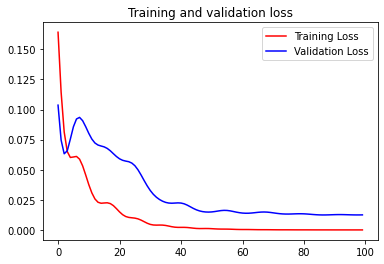

<Figure size 432x288 with 0 Axes>

In [ ]:
#grafik training dan validation loss
training_loss=fitting_history.history['loss']
validation_loss=fitting_history.history['val_loss']
epochs=range(len(training_loss))

plt.plot(epochs, training_loss, 'r', label="Training Loss")
plt.plot(epochs, validation_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

<Figure size 432x288 with 0 Axes>

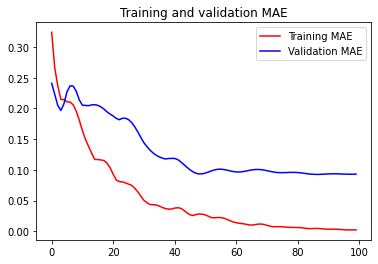

<Figure size 432x288 with 0 Axes>

In [ ]:
#grafik training and validation MAE
training_mae=fitting_history.history['mae']
validation_mae=fitting_history.history['val_mae']
epochs=range(len(training_mae))

plt.plot(epochs, training_mae, 'r', label="Training MAE")
plt.plot(epochs, validation_mae, 'b', label="Validation MAE")
plt.title('Training and validation MAE')
plt.legend(loc=0)
plt.figure()

In [ ]:
model.save('model.h5')

In [ ]:
validation_data=[]
counter=0
for x in input_valid_scaled:
  validation_data.append([])
  for y in x:
    validation_data[counter].append(y)
  counter+=1

validation_data[0]

[0.604166666666667,
 0.5789473684210531,
 0.5367483296213802,
 0.9444444444444446,
 0.8461538461538467,
 0.9183856502242147,
 0.48571428571428577,
 0.26911314984709483,
 0.3743816119948246]

In [ ]:
for i in range(12):
  input_prediksi=[]
  input_prediksi.append([])
  for y in validation_data[i]:
    input_prediksi[0].append(y)
  harga_prediksi = model.predict(input_prediksi)
  harga_prediksi = scaler_output.inverse_transform(harga_prediksi)
  print(harga_prediksi)

[[20841.004]]
[[12721.338]]
[[23397.031]]
[[50802.406]]
[[32326.395]]
[[15664.579]]
[[16682.953]]
[[24784.338]]
[[29586.65]]
[[29252.275]]
[[17318.248]]
[[18923.93]]
